In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'FastFoodRestaurants.csv'
df = pd.read_csv(file)
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


Above I have imported all the necessary modules to perform my analysis. To get a feel for the data I ran a head() method and it shows the data is mostly in string format. Below I run the info() method to confirm this and see only the 'websites' column has any null values. There are also 10,000 entries in the data set. This initial information indicates there will not be much data cleaning needed. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
address       10000 non-null object
city          10000 non-null object
country       10000 non-null object
keys          10000 non-null object
latitude      10000 non-null float64
longitude     10000 non-null float64
name          10000 non-null object
postalCode    10000 non-null object
province      10000 non-null object
websites      9535 non-null object
dtypes: float64(2), object(8)
memory usage: 781.3+ KB


One of the first questions we might have when looking at this data is which restaurants have the most locations  across the country? The 'most_loc' series shows McDonald's is the most represented restaurant in the dataset and it is even more apparent when the series is visualized.

In [4]:
most_locs = df['name'].value_counts().head(10)
print(most_locs)

McDonald's        1886
Burger King       1154
Taco Bell          873
Wendy's            731
Arby's             518
KFC                421
Domino's Pizza     345
Subway             322
SONIC Drive In     226
Hardee's           192
Name: name, dtype: int64


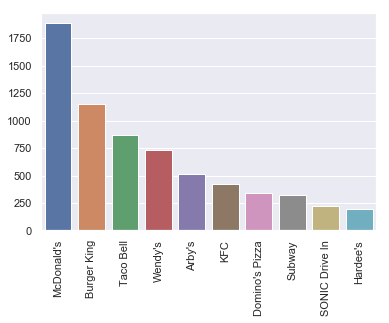

In [5]:
sns.set()
sns.barplot(most_locs.index, most_locs.values)
plt.xticks(rotation=90)
plt.show()

To better understand the data I see which cities have the most fast food locations. The results tell me this dataset
can't be an accurate representation of reality as the 3 most populated cities don't make the list. We also know that majors cities can have over 100 McDonald's locations alone so we cannot use the data extracted from this database to make judgments about the real fast food landscape.

In [6]:
most_city = df['city'].value_counts().head(10)
most_city

Cincinnati       119
Las Vegas         72
Houston           63
Miami             58
Denver            52
Chicago           51
Phoenix           42
Atlanta           41
Columbus          41
Oklahoma City     41
Name: city, dtype: int64

After seeing the national data we can now take a look at individual states. In this case we will look at California, the most populated state. After filtering our database and using the shape attribute we see there are 676 restaurant entries in California. Using the value_counts method's normalize argument we can see the those 676 breakdown by percentage.


In [7]:
ca_df = df[df['province'] == 'CA']
ca_df.shape[0]

676

In [8]:
ca_df1 = ca_df['name'].value_counts(normalize=True).head(10)
ca_df1

McDonald's         0.178994
Taco Bell          0.103550
Jack in the Box    0.096154
Burger King        0.085799
Carl's Jr.         0.062130
Subway             0.041420
Del Taco           0.039941
El Pollo Loco      0.039941
Wendy's            0.038462
KFC                0.035503
Name: name, dtype: float64

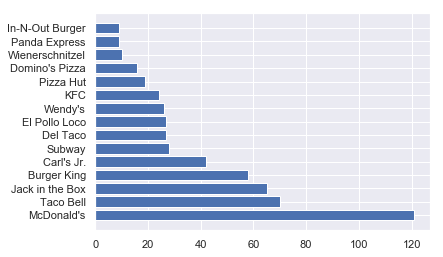

In [9]:
ca_df2 = ca_df['name'].value_counts().head(15)
plt.barh(ca_df2.index, ca_df2.values)
plt.show()

The visualization above shows the numbers of locations for the top 15 in California per the dataset.